# Exploratory Data Analysis

Importing necessary libraries.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from IPython.display import Image

Importing the dataset and describing the features.

In [2]:
diamonds=pd.read_csv('diamonds.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Field Description:
- Carat: weight of the diamond.
- Cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal).
- Color: diamond colour, from J (worst) to D (best).
- Clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).
- Depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y).
- Table: width of top of diamond relative to widest point.
- Price: price in US dollars.
- X: length in mm.
- Y: width in mm.
- Z: depth in mm.

### Data cleaning and EDA

In [3]:
diamonds.shape

(53940, 10)

The data contains 10 features and 53940 observations.

In [4]:
print('Summary statistics of numerical columns')
diamonds.describe()

Summary statistics of numerical columns


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Checking the data types.

In [5]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Calculating the sum of null values in each column.

In [6]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are no null values.

Checking for duplicated rows.

In [7]:
print('There are {} duplicated rows.'.format(diamonds.duplicated().sum()))

There are 146 duplicated rows.


Dropping duplicated rows.

In [8]:
diamonds.drop_duplicates(inplace=True)
print('There are {} duplicated rows.'.format(diamonds.duplicated().sum()))

There are 0 duplicated rows.


Detecting and removing outliers.

The following plot contains boxplots for carat, depth, table, x, y and z.

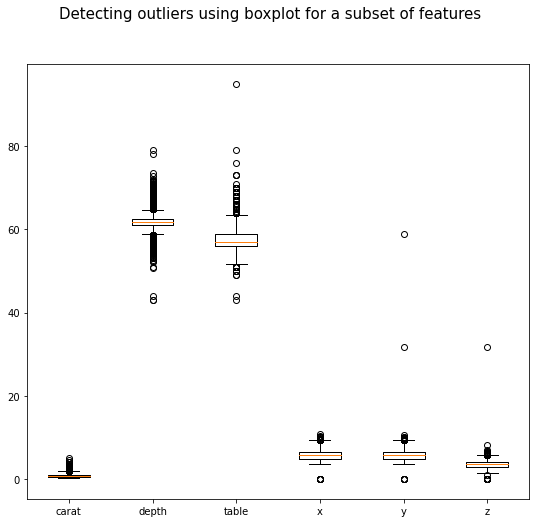

In [9]:
fig = plt.figure(figsize =(9,8))
fig.suptitle('Detecting outliers using boxplot for a subset of features', fontsize=15)
plt.boxplot(diamonds[['carat','depth','table','x','y','z']], labels=('carat','depth','table','x','y','z'))
plt.show()

It seems that values for table above 80 are outliers. Also, values for y and z above 15 are also oultiers.

In [10]:
diamonds.drop(diamonds[diamonds['table'] >80].index, inplace = True)
diamonds.drop(diamonds[diamonds['y'] >15].index, inplace = True)
diamonds.drop(diamonds[diamonds['z'] >15].index, inplace = True)

Summary statistics table shows that there are observations that have 0 value for x, y and z. If either of these values is 0 then the stone does not exist, it should be dropped.

In [11]:
diamonds.drop(diamonds[diamonds['x'] ==0].index, inplace = True)
diamonds.drop(diamonds[diamonds['y'] ==0].index, inplace = True)
diamonds.drop(diamonds[diamonds['z'] ==0].index, inplace = True)

The following plot contains boxplot for the price feature. It is in a separate plot because it has different range from the carat, depth, table, x, y and z.

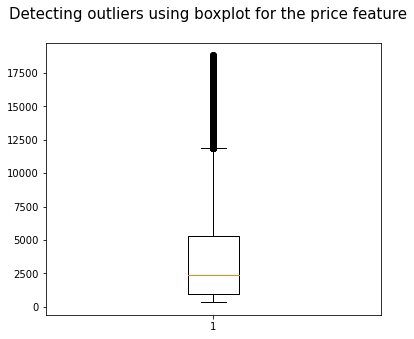

In [12]:
fig = plt.figure(figsize =(6,5))
fig.suptitle('Detecting outliers using boxplot for the price feature', fontsize=15)
plt.boxplot(diamonds[['price']])
plt.show()

The plot shows that there are no outliers for price. 

Visualizing the numerical features ability to (linearly) separate the cut feature.

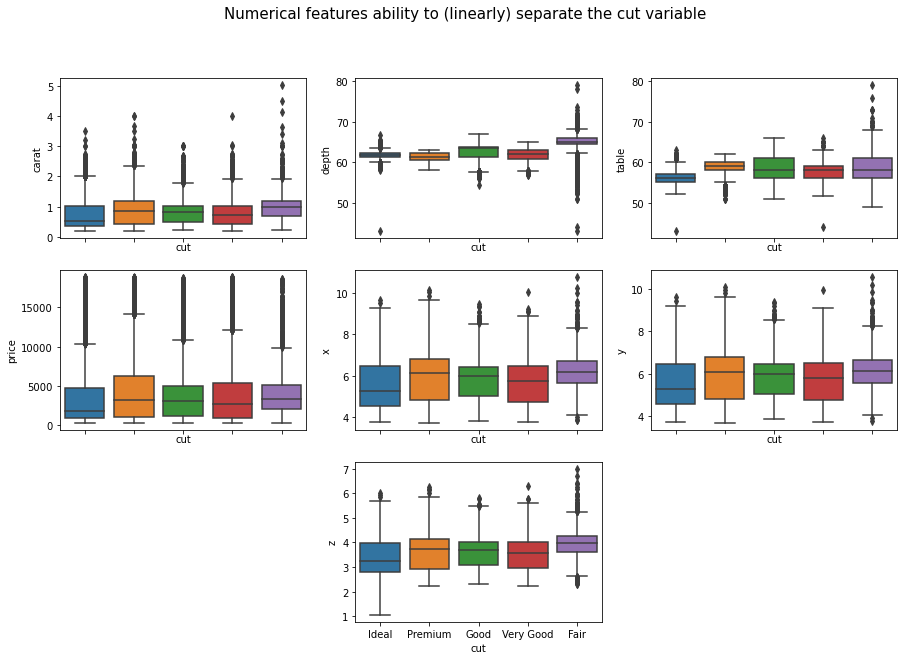

In [13]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(15,10))

fig.suptitle('Numerical features ability to (linearly) separate the cut variable', fontsize=15)
sns.boxplot(ax=axes[0,0],x='cut', y='carat', data=diamonds);
sns.boxplot(ax=axes[0,1],x='cut', y='depth', data=diamonds);
sns.boxplot(ax=axes[0,2],x='cut', y='table', data=diamonds);
sns.boxplot(ax=axes[1,0],x='cut', y='price', data=diamonds);
sns.boxplot(ax=axes[1,1],x='cut', y='x', data=diamonds);
sns.boxplot(ax=axes[1,2],x='cut', y='y', data=diamonds);
sns.boxplot(ax=axes[2,1], x='cut', y='z', data=diamonds);
axes[-1, -1].axis('off');
axes[2, 0].axis('off');

The plot shows that the depth feature followed by the table feature are better in separating the cut variable than other features.

Pairplot for the data, and cut feature passed as a hue.

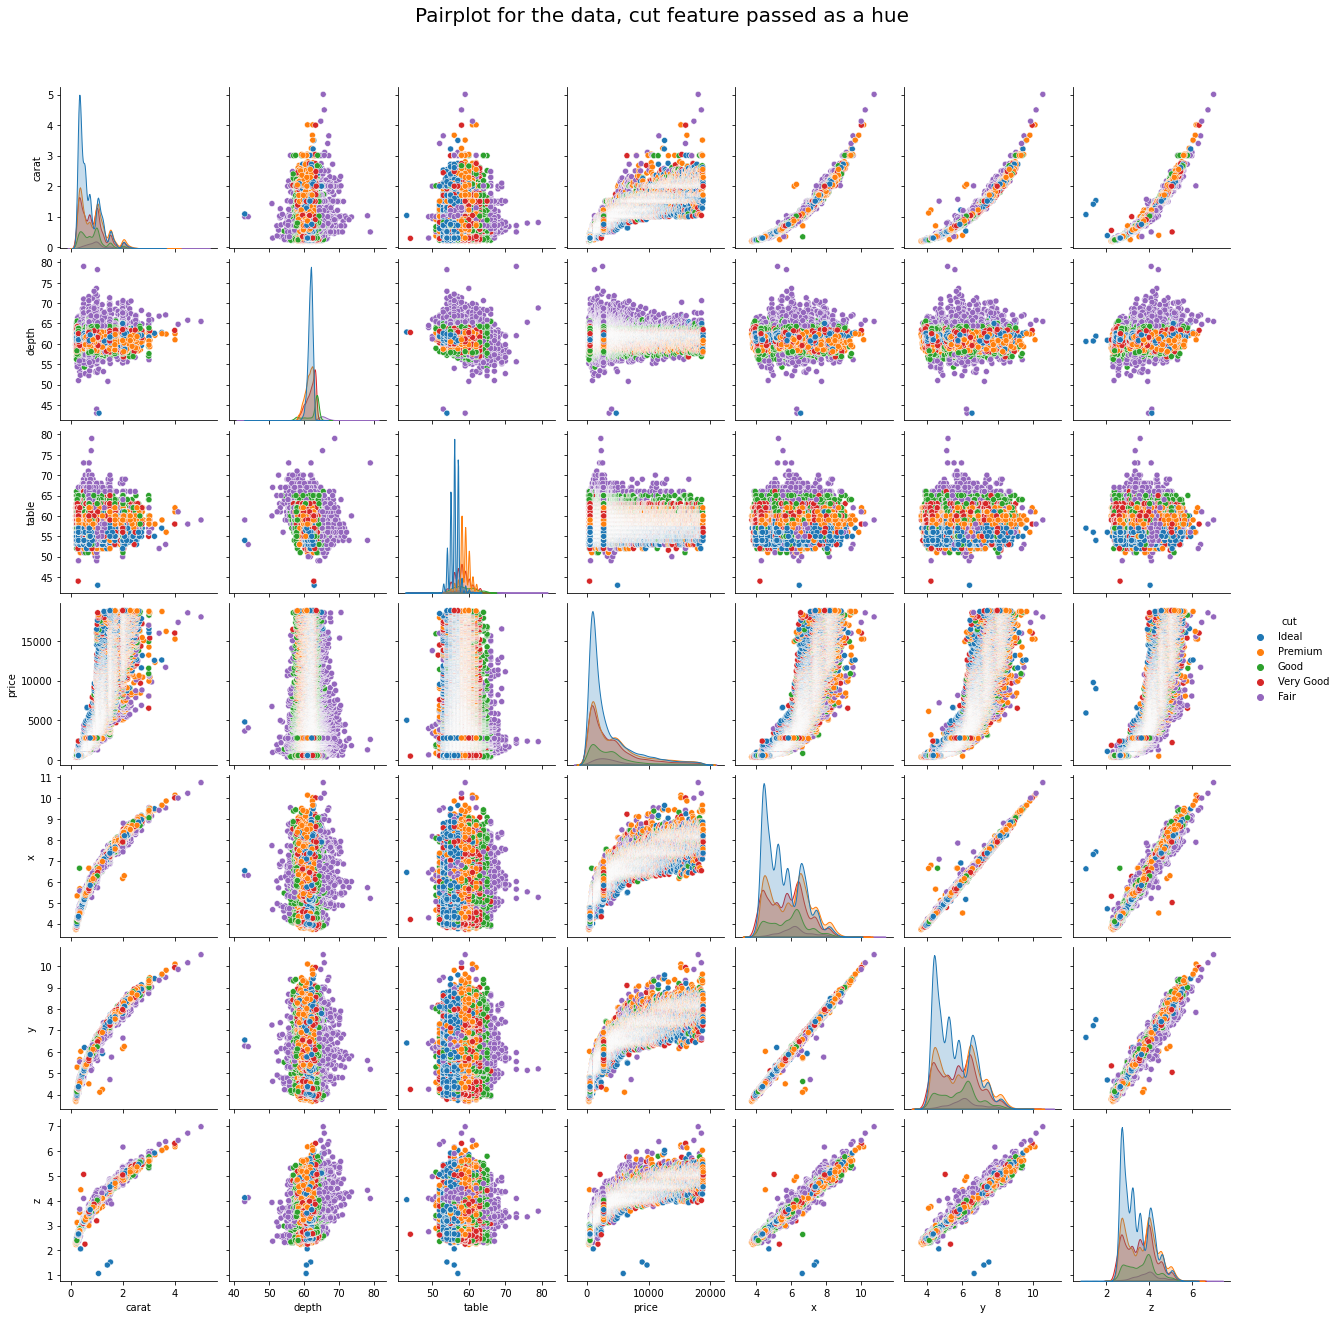

In [14]:
s=sns.pairplot(diamonds, hue='cut');
s.fig.suptitle('Pairplot for the data, cut feature passed as a hue', y=1.05, fontsize=20);

We can see that depth and table show better separation of the cut than other variables.

Visualizing the distribution of the cut feature.

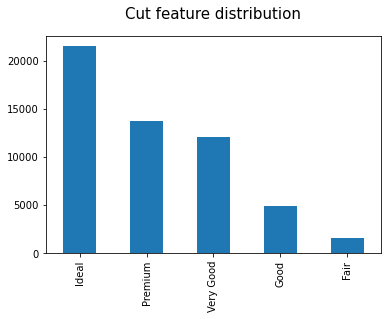

In [15]:
plt.title('Cut feature distribution', y=1.05, fontsize=15);
diamonds.cut.value_counts().plot(kind = 'bar');

In [16]:
diamonds.cut.value_counts()

Ideal        21484
Premium      13736
Very Good    12067
Good          4888
Fair          1596
Name: cut, dtype: int64

The plot shows that there is a huge class imbalance.

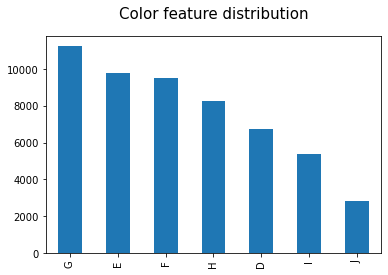

In [17]:
plt.title('Color feature distribution', y=1.05, fontsize=15);
diamonds.color.value_counts().plot(kind = 'bar');

Converting the cut column into numerical values to use it for modeling,
from best (1 = Ideal) to worst (5 = Fair).

In [18]:
def func(x):
    if x=='Ideal':
        return 1
    if x=='Premium':
        return 2
    if x=='Very Good':
        return 3
    if x=='Good':
        return 4
    else: return 5
diamonds['cut']=diamonds['cut'].apply(lambda x: func(x))

### Preparing the data for analysis 

Categorial variables preprocessing

In [19]:
diamonds=pd.get_dummies(diamonds)

Splitting the data into features and target

In [20]:
x=diamonds.drop('cut',axis=1)
y=diamonds['cut']

Creating training, validation and testing sets.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

Numerical variables preprocessing

In [22]:
scaler=StandardScaler()
X_train[['carat','depth','table','price','x','y','z']]=scaler.fit_transform(X_train[['carat','depth','table','price','x','y','z']])
X_val[['carat','depth','table','price','x','y','z']]=scaler.transform(X_val[['carat','depth','table','price','x','y','z']])
X_test[['carat','depth','table','price','x','y','z']]=scaler.transform(X_test[['carat','depth','table','price','x','y','z']])

### Fixing imbalanced classes

As shown EDA section, there is class imbalance. This class imbalance will be solved using oversampling, as it makes sense to generate new observations for diamonds.


4 different classifiers are used to compare the performance of 3 different oversampling techniques (SMOTE, RandomOversampler, ADASYN). After that, the technique that gives the best performance is chosen to be used for the rest of the anaylsis and modeling.

Please note that f1 score has been chosen as the most relevant evaluation metric in the 'Determining the most relevant classification metric(s)' section.

1. SMOTE technique.

In [23]:
def avg(numbers):
    return float(sum(numbers))/len(numbers)

In [24]:
smote=SMOTE()
X_train_sm, y_train_sm=smote.fit_resample(X_train,y_train)

log = LogisticRegression()
log.fit(X_train_sm, y_train_sm)
sgc = SGDClassifier()
sgc.fit(X_train_sm, y_train_sm)
rfc = RandomForestClassifier()
rfc.fit(X_train_sm, y_train_sm)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_sm, y_train_sm)

print("The average of f1 scores across different classifiers using SMOTE oversampling technique is {}".format(avg([metrics.f1_score(y_val, log.predict(X_val), average = 'micro'),metrics.f1_score(y_val, sgc.predict(X_val), average = 'micro')])))

The average of f1 scores across different classifiers using SMOTE oversampling technique is 0.6027524641993677


2. Random oversampling technique.

In [25]:
ros = RandomOverSampler(random_state=0)
X_train_r, y_train_r = ros.fit_resample(X_train,y_train)
log = LogisticRegression()
log.fit(X_train_r, y_train_r)
sgc = SGDClassifier()
sgc.fit(X_train_r, y_train_r)
rfc = RandomForestClassifier()
rfc.fit(X_train_r, y_train_r)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_r, y_train_r)

print("The average of f1 scores across different classifiers using random oversampling technique is {}".format(avg([metrics.f1_score(y_val, log.predict(X_val), average = 'micro'),metrics.f1_score(y_val, sgc.predict(X_val), average = 'micro')])))

The average of f1 scores across different classifiers using random oversampling technique is 0.5484935837827785


3. ADASYN technique.

In [26]:
X_train_adasyn, y_train_adasyn = ADASYN(random_state=42).fit_resample(X_train,y_train)

log = LogisticRegression()
log.fit(X_train_adasyn, y_train_adasyn)
sgc = SGDClassifier()
sgc.fit(X_train_adasyn, y_train_adasyn)
rfc = RandomForestClassifier()
rfc.fit(X_train_adasyn, y_train_adasyn)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_adasyn, y_train_adasyn)

print("The average of f1 scores across different classifiers using ADASYN oversampling technique is {}".format(avg([metrics.f1_score(y_val, log.predict(X_val), average = 'micro'),metrics.f1_score(y_val, sgc.predict(X_val), average = 'micro')])))

The average of f1 scores across different classifiers using ADASYN oversampling technique is 0.5912683652594384


SMOTE and ADASYN have similar performance, but since SMOTE technique achieved the better performance, it will be used for the rest of the analysis and modeling.

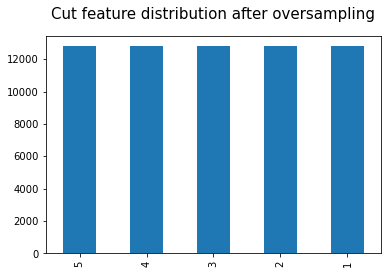

In [27]:
plt.title('Cut feature distribution after oversampling', y=1.05, fontsize=15);
y_train_sm.value_counts().sort_values().plot(kind = 'bar');

### Determining the most relevant classification metric(s)

Confusion matrix of the decision tree is shown below.

In [28]:
def plot_confusion_matrix(model,y, title,X_val):
    confusion_matrix1=confusion_matrix(y, model.predict(X_val))
    plt.figure(figsize = (10,7))
    ax = sns.heatmap(confusion_matrix1, annot=True,fmt = ".0f")
    ax.set_title('Confusion matrix for {}'.format(title));
    ax.xaxis.set_ticklabels(['Ideal','Premium','Very Good','Good','Fair']);
    ax.yaxis.set_ticklabels(['Ideal','Premium','Very Good','Good','Fair']);
    plt.xlabel('Predicted Cut');
    plt.ylabel('Actual Cut');

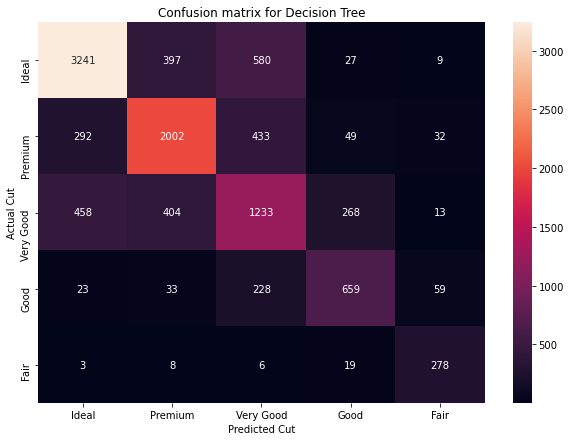

In [29]:
tree = DecisionTreeClassifier()
tree.fit(X_train_sm, y_train_sm)
plot_confusion_matrix(tree,y_val, 'Decision Tree', X_val)

I am interested in predicting the good cut diamonds as good cuts, and bad cut diamonds as bad. If the model predicts the good cuts as bad, this may harm the diamonds seller as it makes him lose money. Also, if it predicts the bad cuts as good, this may harm the diamonds buyer as it makes him pay for a good cut diamond that’s only mediocre. Therefore, F1 is the most appropriate metric to be used in this case as it keeps the balance between the precision and recall.

# Modeling

### 1. Baseline model: 

**KNeighborsClassifier**

Training the model.

In [30]:
neigh = KNeighborsClassifier()
neigh.fit(X_train_sm, y_train_sm)
f1_score=metrics.f1_score(y_val, neigh.predict(X_val), average = 'micro')
print("F1_score for KNeighborsClassifier is {0:.3f}".format(f1_score))

F1_score for KNeighborsClassifier is 0.636


In [31]:
print('Classification report for KNeighborsClassifier')
print(metrics.classification_report(y_val, neigh.predict(X_val)))

Classification report for KNeighborsClassifier
              precision    recall  f1-score   support

           1       0.80      0.82      0.81      4254
           2       0.61      0.64      0.62      2808
           3       0.38      0.32      0.34      2376
           4       0.50      0.54      0.52      1002
           5       0.72      0.75      0.74       314

    accuracy                           0.64     10754
   macro avg       0.60      0.62      0.61     10754
weighted avg       0.63      0.64      0.63     10754



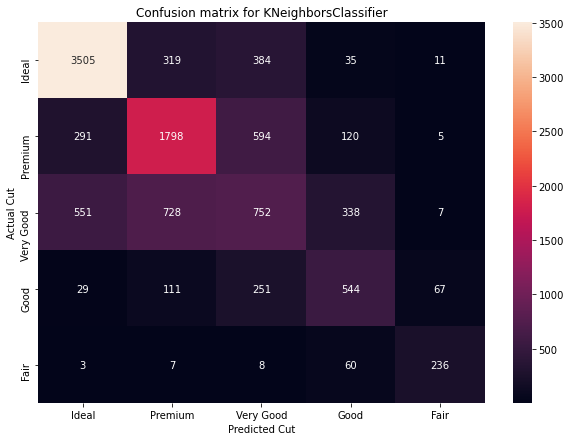

In [32]:
plot_confusion_matrix(neigh,y_val, 'KNeighborsClassifier',X_val)

KNeighborsClassifier achieved f1 score of approximately 0.636

### 2. Model Optimization:

I will try simple classifiers before moving into more complex classifiers.
- Logistic regression
- SGD Classifier
- Decision Tree
- Random Forest
- SVM Classifier


**Logistic regression**

Training the model.

In [33]:
logit = LogisticRegression(multi_class='multinomial')
logit.fit(X_train_sm, y_train_sm)
f1_score=metrics.f1_score(y_val, logit.predict(X_val), average = 'micro')
print("F1_score for logistic regression is {0:.3f}".format(f1_score))

F1_score for logistic regression is 0.612


Tuning the hyperparameters.

In [34]:
logit = LogisticRegression(multi_class='multinomial')
grid_values = {'penalty': ['l1', 'l2'],'C':[100,1000,4000,6000,8000,10000,100000], 'solver': ['liblinear', 'saga', 'newton-cg'] }
logit_grid = GridSearchCV(logit, param_grid = grid_values,cv=3, scoring = 'f1_micro')
logit_grid.fit(X_train_sm, y_train_sm)
logit_grid.best_estimator_

LogisticRegression(C=100000, multi_class='multinomial', solver='newton-cg')

In [35]:
f1_score=metrics.f1_score(y_val, logit_grid.predict(X_val), average = 'micro')
print("F1_score for logistic regression after tuning hyperparameters is {0:.3f}".format(f1_score))

F1_score for logistic regression after tuning hyperparameters is 0.614


In [36]:
print('Classification report for best logistic regression classifier')
print(metrics.classification_report(y_val, logit_grid.predict(X_val)))

Classification report for best logistic regression classifier
              precision    recall  f1-score   support

           1       0.77      0.72      0.74      4254
           2       0.67      0.69      0.68      2808
           3       0.44      0.45      0.45      2376
           4       0.36      0.33      0.34      1002
           5       0.38      0.60      0.46       314

    accuracy                           0.61     10754
   macro avg       0.52      0.56      0.53     10754
weighted avg       0.62      0.61      0.62     10754



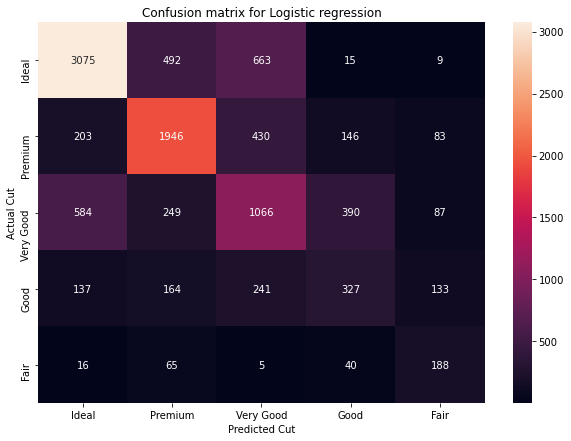

In [37]:
plot_confusion_matrix(logit_grid,y_val, 'Logistic regression',X_val)

**SGDClassifier**

Training the model.

In [38]:
sgc = SGDClassifier()
sgc.fit(X_train_sm, y_train_sm)
f1_score=metrics.f1_score(y_val, sgc.predict(X_val), average = 'micro')
print("F1_score for SGD classifier is {0:.3f}".format(f1_score))

F1_score for SGD classifier is 0.566


Tuning the hyperparameters.

In [39]:
sgd = SGDClassifier()
grid = {'alpha': [1e-4, 1e-2, 1e-1, 1e0, 1e2, 1e3],'max_iter': [100,500,1000], 'loss': ['log'],'penalty': ['l1','l2']}
sgd_cv=GridSearchCV(sgd,param_grid = grid,cv=3, scoring = 'f1_micro')
sgd_cv.fit(X_train_sm, y_train_sm)
sgd_cv.best_estimator_

SGDClassifier(loss='log', penalty='l1')

In [40]:
f1_score=metrics.f1_score(y_val, sgd_cv.predict(X_val), average = 'micro')
print("F1_score for SGD classifier after tuning hyperparameters is {0:.3f}".format(f1_score))

F1_score for SGD classifier after tuning hyperparameters is 0.624


In [41]:
print('Classification report for best SGD classifier')
print(metrics.classification_report(y_val, sgd_cv.predict(X_val)))

Classification report for best SGD classifier
              precision    recall  f1-score   support

           1       0.76      0.74      0.75      4254
           2       0.69      0.69      0.69      2808
           3       0.45      0.52      0.48      2376
           4       0.42      0.20      0.27      1002
           5       0.34      0.61      0.43       314

    accuracy                           0.62     10754
   macro avg       0.53      0.55      0.52     10754
weighted avg       0.63      0.62      0.62     10754



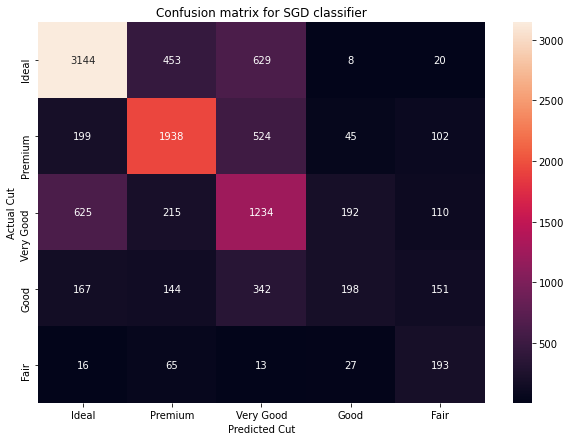

In [42]:
plot_confusion_matrix(sgd_cv,y_val, 'SGD classifier',X_val)

Unfortunately, both logistic regression and SGD did not achieve a better f1 score than the baseline model.

**DecisionTreeClassifier**

Training the model.

In [43]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_sm, y_train_sm)
f1_score=metrics.f1_score(y_val, decision_tree.predict(X_val), average = 'micro')
print("F1_score for Decision tree is {0:.3f}".format(f1_score))

F1_score for Decision tree is 0.688


Tuning the hyperparameters.

In [44]:
decision_tree = DecisionTreeClassifier()
params = {'max_leaf_nodes': list(range(5, 30)), 'min_samples_split': [2, 3, 4],'criterion':['gini','entropy'],'max_depth':[8,10,20,30,50,70]}
decision_tree_grid = GridSearchCV(decision_tree, param_grid = params,cv=3,scoring = 'f1_micro')
decision_tree_grid.fit(X_train_sm, y_train_sm)
decision_tree_grid.best_estimator_

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=28)

In [45]:
f1_score=metrics.f1_score(y_val, decision_tree_grid.predict(X_val), average = 'micro')
print("F1_score for decision tree classifier after tuning hyperparameters is {0:.3f}".format(f1_score))

F1_score for decision tree classifier after tuning hyperparameters is 0.726


In [46]:
print('Classification report for the best decision tree classifier')
print(metrics.classification_report(y_val, decision_tree_grid.predict(X_val)))

Classification report for the best decision tree classifier
              precision    recall  f1-score   support

           1       0.83      0.89      0.86      4254
           2       0.67      0.78      0.72      2808
           3       0.59      0.37      0.46      2376
           4       0.61      0.66      0.64      1002
           5       0.83      0.94      0.88       314

    accuracy                           0.73     10754
   macro avg       0.71      0.73      0.71     10754
weighted avg       0.72      0.73      0.71     10754



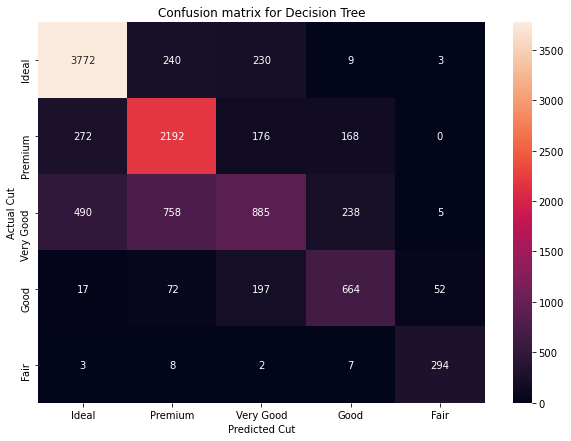

In [47]:
plot_confusion_matrix(decision_tree_grid,y_val, 'Decision Tree', X_val)

The best Decision tree classifier achieved f1 score of approximately 0.726

**RandomForestClassifier**

Training the model.

In [48]:
random_forest=RandomForestClassifier()
random_forest.fit(X_train_sm, y_train_sm)
f1_score=metrics.f1_score(y_val, random_forest.predict(X_val), average = 'micro')
print("F1_score for Random Forest is {0:.3f}".format(f1_score))

F1_score for Random Forest is 0.753


In [49]:
print('Classification report for the Random Forest classifier')
print(metrics.classification_report(y_val, random_forest.predict(X_val)))

Classification report for the Random Forest classifier
              precision    recall  f1-score   support

           1       0.83      0.89      0.86      4254
           2       0.74      0.77      0.76      2808
           3       0.61      0.47      0.53      2376
           4       0.67      0.71      0.69      1002
           5       0.85      0.89      0.87       314

    accuracy                           0.75     10754
   macro avg       0.74      0.75      0.74     10754
weighted avg       0.74      0.75      0.75     10754



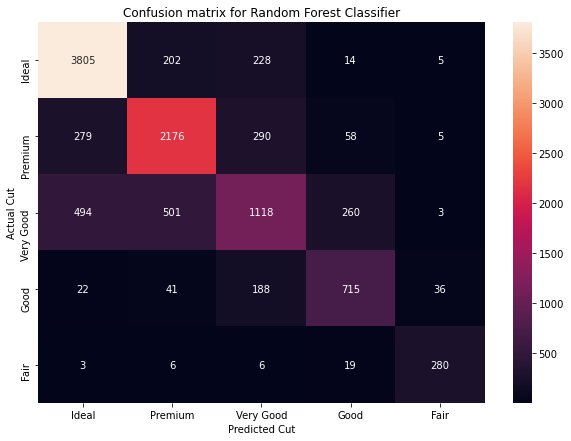

In [50]:
plot_confusion_matrix(random_forest,y_val, 'Random Forest Classifier',X_val)

Random forest achieved a good f1 score of approximately 0.753

**SVM Classifier**

Training the model.

In [51]:
svm=SVC(gamma='auto')
svm.fit(X_train_sm, y_train_sm)
f1_score=metrics.f1_score(y_val, svm.predict(X_val), average = 'micro')
print("F1_score for SVM Classifier is {0:.3f}".format(f1_score))

F1_score for SVM Classifier is 0.736


In [52]:
print('Classification report for SVM Classifier')
print(metrics.classification_report(y_val, svm.predict(X_val)))

Classification report for SVM Classifier
              precision    recall  f1-score   support

           1       0.82      0.88      0.85      4254
           2       0.74      0.78      0.76      2808
           3       0.59      0.41      0.48      2376
           4       0.57      0.74      0.65      1002
           5       0.84      0.86      0.85       314

    accuracy                           0.74     10754
   macro avg       0.71      0.73      0.72     10754
weighted avg       0.73      0.74      0.73     10754



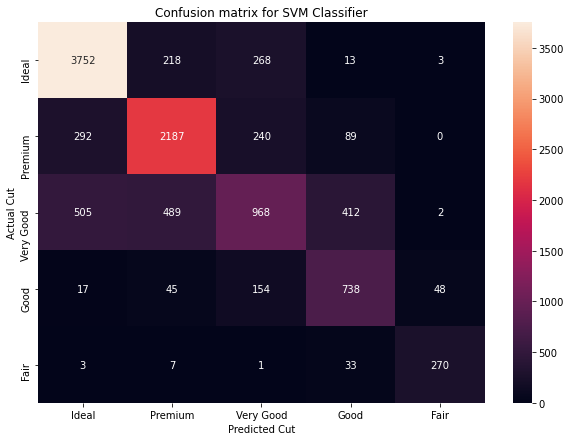

In [53]:
plot_confusion_matrix(svm,y_val, 'SVM Classifier', X_val)

Although SVM achieved relatively good f1 score, Random forest model has better performance.

## Finalizing, testing, and interpreting the best model



The best model is Random Forest model. I will combine the training and validation sets in a single set to be used for training.

In [54]:
X_train_combined=pd.concat([X_train,X_val])
y_train_combined=pd.concat([y_train,y_val])
X_train_sm, y_train_sm=smote.fit_resample(X_train_combined,y_train_combined)

Fitting the data and performing cross validation on the whole training set.

In [55]:
random_forest=RandomForestClassifier()
random_forest.fit(X_train_sm, y_train_sm)
scores=cross_val_score(random_forest, X_train_sm, y_train_sm, cv=3, scoring='f1_micro')
print('Average f1 scores after perfoming cross validation is {0:.3f}'.format(np.mean(scores)))

Average f1 scores after perfoming cross validation is 0.858


Testing the model using test data.

In [56]:
f1_score=metrics.f1_score(y_test, random_forest.predict(X_test), average = 'micro')
print("F1_score for Random Forest on the test data is {0:.3f}".format(f1_score))

F1_score for Random Forest on the test data is 0.760


In [57]:
print('Classification report for the Random Forest classifier')
print(metrics.classification_report(y_test, random_forest.predict(X_test)))

Classification report for the Random Forest classifier
              precision    recall  f1-score   support

           1       0.84      0.89      0.87      4426
           2       0.74      0.79      0.76      2671
           3       0.62      0.48      0.55      2394
           4       0.66      0.73      0.69       960
           5       0.85      0.89      0.87       304

    accuracy                           0.76     10755
   macro avg       0.74      0.76      0.75     10755
weighted avg       0.75      0.76      0.75     10755



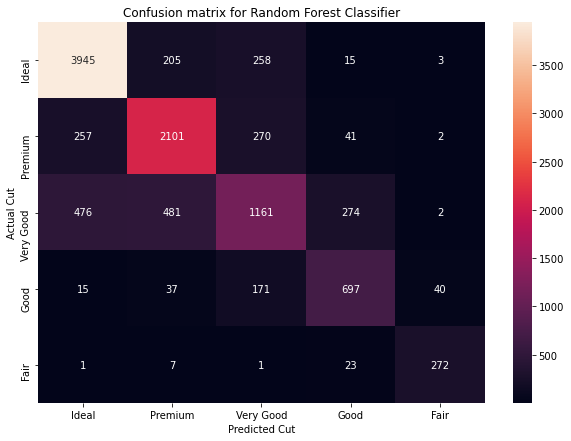

In [58]:
plot_confusion_matrix(random_forest,y_test, 'Random Forest Classifier', X_test)

Plotting feature importances for the random forest classifier.

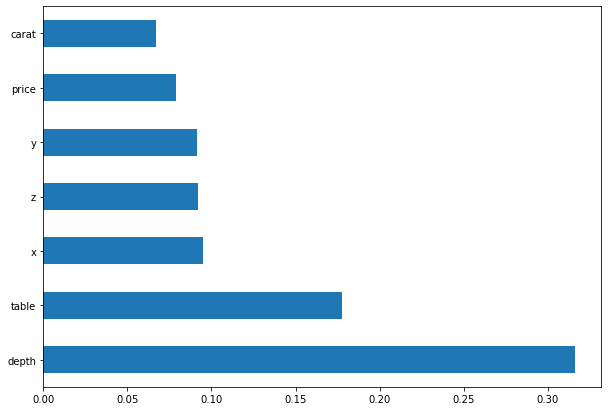

In [59]:
plt.figure(figsize=(10,7))
feat_importances = pd.Series(random_forest.feature_importances_, index = X_train.columns)
feat_importances.nlargest(7).plot(kind='barh');

The depth followed by the table are the most important features as expected during the EDA section. And nearly all reamining features have the same importance.

Saving the scaler and the best model in a pickle to use them in the web app.

In [60]:
pickle_out=open('scaler.pkl','wb')
pickle.dump(scaler,pickle_out)
pickle_out.close()

In [61]:
pickle_out=open('predictor.pkl','wb')
pickle.dump(random_forest,pickle_out)
pickle_out.close()

# Web App

A simple web page has been built using Streamlit tool, it predicts the cut quality using the model that achieved the highest f1 score (Random forest model).
A screen shot of the web page is shown below. The user enters the diamonds characterstics and the predicted cut quality is shown once the used hits 'Predict Diamond's Cut' button.

<img src="webApp/webApp.png" />